Day 4: EDA
----------

In [1]:
# Loading the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_parquet("../data/processed/flights_features.parquet")
df.shape

(7494236, 22)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8316\2098870082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x=df['is_delay'], palette='pastel')


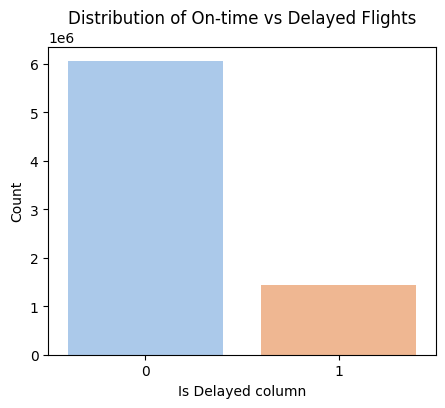

On-time: 80.8%, Delayed: 19.2%


In [2]:
# Plotting the distribution of is_delayed (self-learning coding no prior knowledge)
plt.figure(figsize=(5, 4))
plot = sns.countplot(x=df['is_delay'], palette='pastel')
plot.set_title('Distribution of On-time vs Delayed Flights')
plot.set_xlabel('Is Delayed column')
plot.set_ylabel('Count')
plt.show()

# ...existing code...
# Percentages for is_delay values
pcts = df['is_delay'].value_counts(normalize=True).sort_index() * 100  # percentages

# access individual percentages
pct_on_time = pcts.get(0, 0) # for on-time
pct_delayed = pcts.get(1, 0) # for delayed
print(f"On-time: {pct_on_time:.1f}%, Delayed: {pct_delayed:.1f}%")
# ...existing code...

- 80.8% of flights are on time while 19.2% of flights are delayed.
- Depending of coaching, idk if I i could say the distribution is balanced for now.
- If the target is predicting the minutes that the delay might occur by, then we should keep all the rows otherwise, we could train the model on data that is sure to lead to a delay.

In [3]:
# Filtering the dataset where a delay occurs
delayed_df = df[df["is_delay"] == 1]
delayed_df.shape

(1441722, 22)

1. There are 1,441,722 rows with information where a delay occurs.
- New dataframe shape is (1441722, 22).
2. I filtered the dataset where a delay occurs - (delayed_df = df[df["is_delay"] == 1]).
3. So that I can do EDA to get insights when a delay occurs.

In [4]:
# dropping feature non-needed for eda
labels_drop = ['op_unique_carrier','origin_airport_id','origin','dest_airport_id','dest','dep_delay'
               ,'arr_delay', 'arr_delay_new','source_file','is_delay','year','month','day','day_of_week','is_weekend']
eda_df = delayed_df.drop(columns=labels_drop, axis=1)
eda_df.head()

,fl_date,dep_delay_new,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
8,2024-09-01,230.0,3.0,0.0,0.0,0.0,217.0
24,2024-09-01,44.0,35.0,0.0,0.0,0.0,0.0
29,2024-09-01,81.0,0.0,0.0,13.0,0.0,81.0
40,2024-09-01,67.0,0.0,0.0,3.0,0.0,67.0
42,2024-09-01,139.0,133.0,0.0,0.0,0.0,0.0


dep_delay_new          1.000000
carrier_delay          0.669600
late_aircraft_delay    0.513862
weather_delay          0.291326
nas_delay              0.172149
security_delay         0.015232
Name: dep_delay_new, dtype: float64

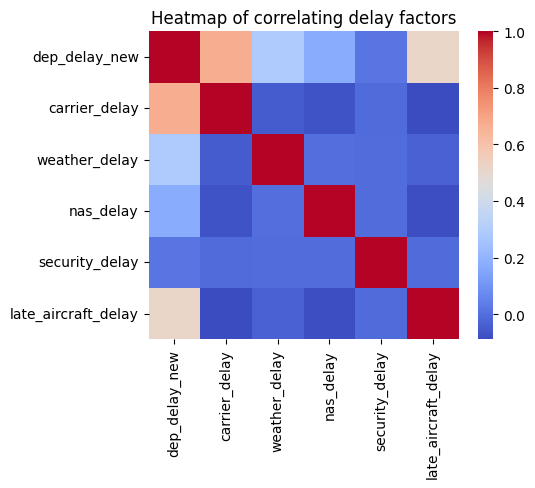

In [5]:
# heatmap of the most features correlating with delay occurence
corr = eda_df.corr(numeric_only=True) # numerical only to exclude the date

plt.figure(figsize=(5, 4))
sns.heatmap(corr, cmap="coolwarm")
plt.title("Heatmap of correlating delay factors")
plt.show

# Top factors that correlate with delays
corr["dep_delay_new"].sort_values(ascending=False).head(10)

- The most 2 significant correlating factors of delays are:-
    1. Carrier caused Delays(0.6696)
    2. A late aircraft delay(0.51386)

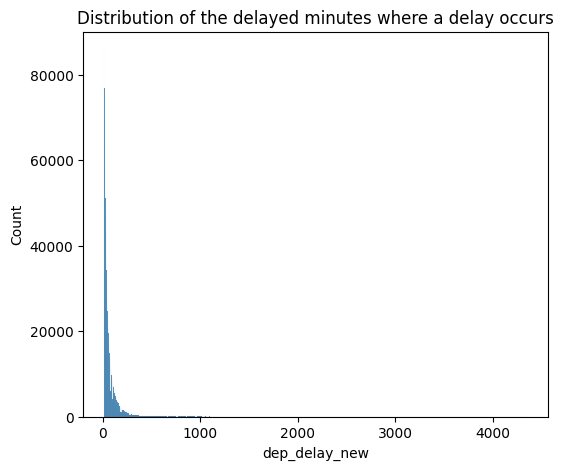

In [7]:
# Distribution of Delay minutes.
# If we're to keep the whole dataset
# Against all rows with delay minutes.

plt.figure(figsize=(6,5))
sns.histplot(data=eda_df["dep_delay_new"], kde=False)
plt.title("Distribution of the delayed minutes where a delay occurs")
plt.show()

- The target variable is definitely screwed and having extreme values in outliers for both reduced and full dataset.
- It is right-skewed with a long tail extending to the right.
    - The tail is "thin" prominently from 1000 - 4000 minutes.

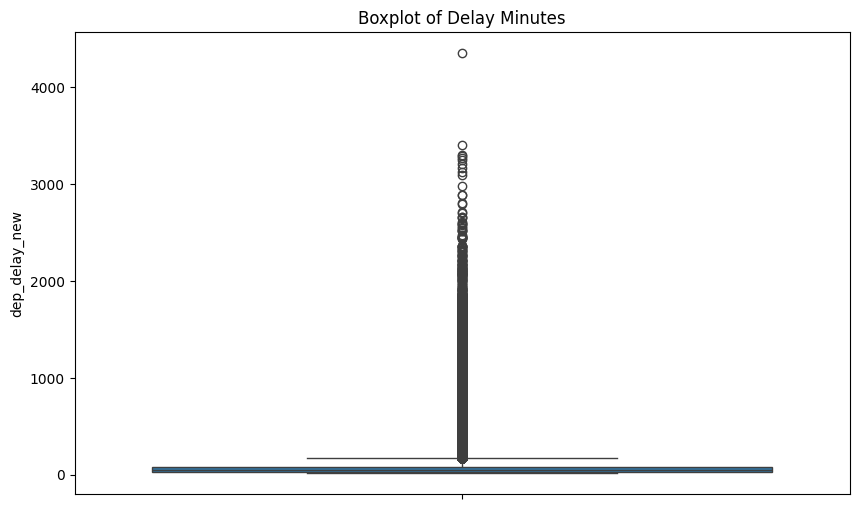

In [9]:
# Boxplot of delay minutes
plt.figure(figsize=(10,6))
sns.boxplot(y=eda_df['dep_delay_new'])
plt.title("Boxplot of Delay Minutes")
plt.show()

- We can therefore say that:-
    - All outliers in dep_delay_new exist above 1000 minutes, steadily.